**Libraries**

In [23]:
import tensorflow as tf
import tensorflow_hub as hub
!pip install tensorflow_text
import tensorflow_text as text
import pandas as pd
import pickle 
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
df = pd.read_csv("data.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [6]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


#####Train Test Split

In [7]:
from sklearn.model_selection import  train_test_split

In [17]:
X_train,X_test, Y_train, Y_test = train_test_split(df['Message'], df['spam'])

In [9]:
len(X_train)

4179

Downloading bert_preprocess and bert_encoder

In [10]:
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')
bert_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')

In [11]:
def get_sentance_embedding(sentances):
  result = bert_preprocess(sentances)
  return bert_encoder(result)['pooled_output']

In [12]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
output = get_sentance_embedding(text_input)

l = tf.keras.layers.Dropout(0.3,name='dropout')(output)
l = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(l)

model = tf.keras.Model(inputs=[text_input], outputs=[l])
model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_1 (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [13]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [20]:
history = model.fit(X_train, Y_train, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
131/131 [==============================] - 63s 479ms/step - loss: 0.1719 - accuracy: 0.9328 - val_loss: 0.1364 - val_accuracy: 0.9490
Epoch 2/5
131/131 [==============================] - 58s 441ms/step - loss: 0.1679 - accuracy: 0.9373 - val_loss: 0.1253 - val_accuracy: 0.9677
Epoch 3/5
131/131 [==============================] - 64s 488ms/step - loss: 0.1470 - accuracy: 0.9483 - val_loss: 0.1181 - val_accuracy: 0.9641
Epoch 4/5
131/131 [==============================] - 64s 491ms/step - loss: 0.1461 - accuracy: 0.9450 - val_loss: 0.1116 - val_accuracy: 0.9713
Epoch 5/5
131/131 [==============================] - 64s 488ms/step - loss: 0.1410 - accuracy: 0.9526 - val_loss: 0.1060 - val_accuracy: 0.9713


In [22]:
# with open('model_pickle', 'wb') as f:
#   pickle.dump(model, f)

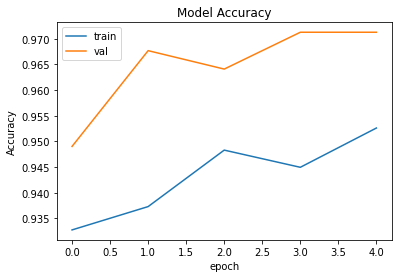

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

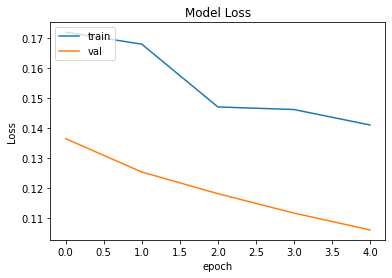

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()